In [106]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [102]:
Xall=wine['data']
y=wine['target']
Xall.shape, y.shape

((178, 13), (178,))

알코올과 빛깔의 상관관계

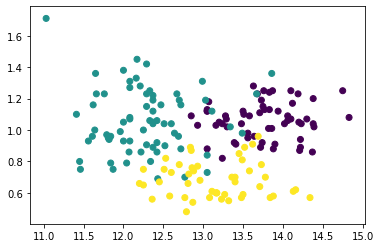

In [100]:
X=[Xall[:,0],Xall[:,10]]
plt.scatter(X[0],X[1],c=y)

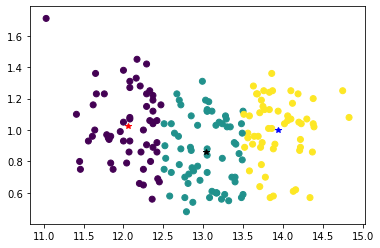

In [101]:
temp=[]
for (i,j) in zip(X[0],X[1]):
    r1=(i-12)**2 + (j-0.9)**2
    r2=(i-13)**2 + (j-0.9)**2
    r3=(i-14)**2 + (j-0.9)**2
    m=min(r1,r2,r3)
    temp.append([r1,r2,r3].index(m))
    n=n+1

x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
r1=np.mean(x1[0]),np.mean(x1[1])
r2=np.mean(x2[0]),np.mean(x2[1])
r3=np.mean(x3[0]),np.mean(x3[1])

plt.scatter(X[0],X[1],c=temp)
plt.plot(r1[0],r1[1],'r*')
plt.plot(r2[0],r2[1],'k*')
plt.plot(r3[0],r3[1],'b*')

알코올과 프롤린의 상관관계

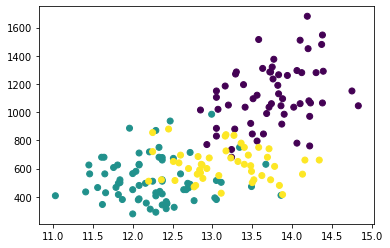

In [95]:
X=[Xall[:,0],Xall[:,12]]
plt.scatter(X[0],X[1],c=y) 

In [98]:
temp=[]
for (i,j) in zip(X[0],X[1]):
    r1=(i-12)**2 + (j-400)**2
    r2=(i-13)**2 + (j-400)**2
    r3=(i-14)**2 + (j-400)**2
    m=min(r1,r2,r3)
    temp.append([r1,r2,r3].index(m))
    n=n+1

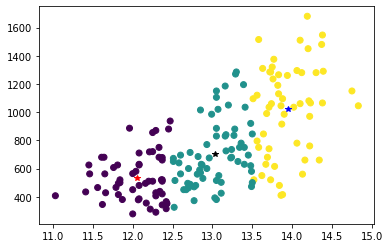

In [99]:
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
r1=np.mean(x1[0]),np.mean(x1[1])
r2=np.mean(x2[0]),np.mean(x2[1])
r3=np.mean(x3[0]),np.mean(x3[1])

plt.scatter(X[0],X[1],c=temp)
plt.plot(r1[0],r1[1],'r*')
plt.plot(r2[0],r2[1],'k*')
plt.plot(r3[0],r3[1],'b*')

결과 : 와인의 3종류의 클래스가 분배되어있는데 그 중 13개의 특성으로 분류할 수 있다. 나는 알코올과 빛깔의 관계를 알고 싶어 k-mean clustering 방법을 사용했다. 집단이 3개 이므로 중심점을 임의의점 3개로 선택해서 정했다. 하지만 분류결과 알코올과 빛깔의 상관관계가 없어보이는것을 확일 할 수 있었다. 따라서 다른 특성을 이용해 분류해보기로 했다. 
다음은 알코올과 프롤린의 상관관계를 알아보았다. 프롤린은 와인에 존재하는 가장 풍부한 아미노산으로 단백질 합성 및 구조, 영양은 물론 항산화 반응, 면역 반응에서 중요한 역할을 한다. 집단 3개를 k-mean clustering 방법으로 분류한 결과 알코올과 프롤린이 비례적인 관계를 나타냈다.
즉, 와인의 빛깔은 특별히 알코올의 도수와 크게 상관이 없지만 알코올의 도수가 높을수록 점차 프롤린의 함량이 많아지는 것을 알 수 있다.